In [116]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
sys.path.append("../")
from diabnet.apply_ensemble import Predictor
from diabnet.data import get_feature_names, encode_features
from diabnet.ensemble import Ensemble

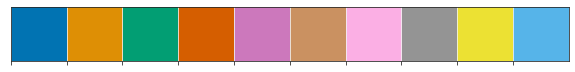

In [118]:
colors = sns.color_palette("colorblind")
sns.palplot(colors)
sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid': True,'grid.color': '.95', 'grid.linestyle': '-'})

In [119]:
def plot():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    color_boxplot = sns.color_palette("cool", n_colors=20)
#     plt.title(f"patient\n(id: {df['id'].iloc[id]}, age: {age}, diagnostic: {'positive' if label==1 else 'negative'})")
#     sns.boxplot(x=[i for i in probs_life[1]], y=probs_life[0], showfliers=False, palette=[color_boxplot[int(np.median(a)*20)] for a in probs_life[0]]);
    bp1 = plt.boxplot(probs_life[0], showfliers=False, patch_artist=True, labels=[i for i in probs_life[1]], medianprops=dict(linewidth=2.5, color='black'))
    colors = [color_boxplot[int(np.median(a)*20)] for a in probs_life[0]]
    for box, color in zip(bp1['boxes'], colors):
        box.set(facecolor = color)
        box.set(edgecolor = 'black')
    plt.xlabel("age")
    plt.ylim(0,1);
    plt.subplot(122)
    plt.title("negative control\n(non-diabetic older than 60 years)")
#     sns.boxplot(x=[i for i in neg_life[1]], y=neg_life[0], showfliers=False, palette=[color_boxplot[int(np.median(a)*20)] for a in neg_life[0]]);
    bp2 = plt.boxplot(neg_life[0], showfliers=False, patch_artist=True, labels=[i for i in neg_life[1]], medianprops=dict(linewidth=2.5, color='black'))
    colors = [color_boxplot[int(np.median(a)*20)] for a in neg_life[0]]
    for box, color in zip(bp2['boxes'], colors):
        box.set(facecolor = color)
        box.set(edgecolor = 'black')
    plt.xlabel("age")
    plt.ylim(0,1);

In [120]:
# ensemble = Ensemble('../diabnet/models/model-4-soft-label-age-positives-500-dropout0-bn-decay-flood-hyperopt-ax-batch256-adamw-lc2-20201001')
# c = get_feature_names("../datasets/visits_sp_unique_test_positivo_1000_random_0.csv", BMI=False, sex=True, parents_diagnostics=True)
# pred = Predictor(ensemble, c, "../datasets/visits_sp_unique_test_positivo_1000_random_0_negatives_older60.csv")

In [129]:
ensemble = Ensemble('../results/models/positive/model-positive-21-adamw-lc7-2021-10-05')
c = get_feature_names("../data/datasets/visits_sp_unique_test_positivo_1000_random_0.csv", use_sex=True, use_parents_diagnosis=True)
pred = Predictor(ensemble, c, "../data/datasets/visits_sp_unique_test_positivo_1000_random_0_negatives_older60.csv")

NEGATIVE FILE ../data/datasets/visits_sp_unique_test_positivo_1000_random_0_negatives_older60.csv


In [130]:
neg_life = pred.negatives_life(samples_per_model=1)

## Análise do baseline

O uso de Integrated Gradients depende da definição de um baseline. Esse baseline é um exemplo de entrada que define um caso para ser utilizado como um âncora (base) relativa.

Optamos aqui por utilizar como baseline um indivíduo hipotético que apresenta alelos dominantes (**0**) para todos os SNPs. A idade desse indivíduo é a mesma para os demais sendo analisado e o diagnóstico dos pais é **negativo**.

Abaixo analisaremos qual a predição para esse indivíduo.

In [131]:
baseline_snps = [0 for i in range(1000)]

In [132]:
baseline = np.array(baseline_snps +[50., 'X', 2, 2], dtype=object)

In [133]:
baseline[-10:]

array([0, 0, 0, 0, 0, 0, 50.0, 'X', 2, 2], dtype=object)

In [134]:
probs_life = pred.patient_life(baseline, samples_per_model=1)

In [135]:
probs_life

([array([4.47804780e-08, 8.34640246e-10, 5.14617611e-08, 8.94475605e-10,
         1.13324763e-08, 7.64195818e-10, 3.62111480e-10, 2.27767707e-08,
         4.78111604e-12, 1.35800871e-10, 3.19759952e-09, 1.08868504e-11,
         4.62631569e-08, 2.20431318e-09, 8.27453928e-09, 2.16251195e-08,
         4.29431020e-06, 2.03924078e-08, 3.12566861e-08, 4.10935973e-11,
         1.92047833e-06, 4.35771341e-07, 4.69651766e-08, 2.43067348e-07,
         1.59752114e-10, 1.84673343e-08, 5.95595795e-10, 1.61565639e-09,
         1.62274091e-07, 3.80328713e-10, 1.08799777e-05, 1.91361892e-06,
         7.82991894e-09, 1.27387167e-07, 1.42072454e-09, 4.42300552e-09,
         1.79727999e-09, 1.18773563e-07, 3.44786417e-06, 2.53057109e-09,
         1.07607541e-07, 1.50342586e-07, 3.90669985e-09, 5.91318781e-08,
         5.53436763e-08, 1.11430387e-09, 2.86711627e-11, 2.67373762e-10,
         2.56454771e-11, 2.40469724e-08, 5.47163759e-10, 4.08793621e-09,
         1.16893511e-06, 1.44850947e-05, 6.06268202

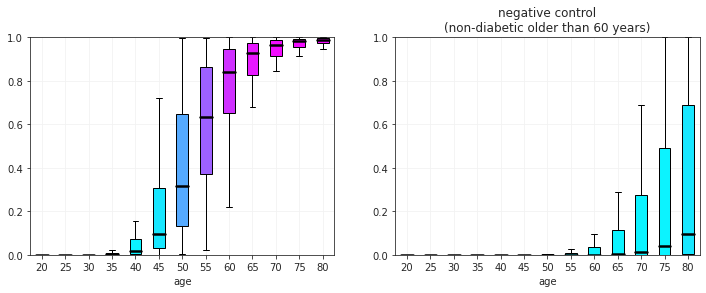

In [136]:
plot()

In [102]:
np.mean(probs_life[0][0])

3.1959036e-07

In [114]:
import torch
ensemble.models[0].apply(torch.Tensor(encode_features(c, baseline)))

RuntimeError: running_mean should contain 2 elements not 7

In [104]:
encode_features?

In [115]:
pred._encode_features(baseline)[0,:,-20:]

tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 0., 0., 2., 0.,
         0., 2.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0.]])